# *Desafio* Rocketmat - Análise do Banco de Dados HR Engagement Set Sales (2020)

**Antes de Começar** iremos carregar os pacotes que iremos utilizar em nossa análise:


1.   **Pandas**: Para carregar e manipular os dados;
2.   **Matplotlib.pyplot**: Para plotar os gráficos;
3.   **Seaborn**: Plotar gráficos
4.   **Collections**: Para poder utilizar a função "counter", que cria um dicionário com o número de elementos;




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections as clc
#from collections import Counter 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


-------------

## Carregar o Banco de Dados

*Carregar o banco de dados direto do meu GitHub*.
> O banco de dados vai ser chamado de "db". Irei utilizar o pacote 'pandas' para carrega-lo.





In [3]:
url = 'https://raw.github.com/anacarolpimenta/Desafio-Rocketmat/master/HR_Engagement_Sat_Sales_UpdatedV4.0.csv'
db = pd.read_csv(url)

****

## Breve exploração do Banco de Dados

### **1)** Conferir formato do banco de dados:

In [ ]:
db.shape

(14999, 62)

Aqui posso conferir que o banco de dados tem 14.999 observações e 62 colunas;

### **2)** Verificar o nome das colunas, das nossas variáveis

In [ ]:
for col_name in db.columns:
  print(col_name)

ID
Name
Department
GEO
Role
Rising_Star
Will_Relocate
Critical
Trending Perf
Talent_Level
Validated_Talent_Level
Percent_Remote
EMP_Sat_OnPrem_1
EMP_Sat_OnPrem_2
EMP_Sat_OnPrem_3
EMP_Sat_OnPrem_4
EMP_Sat_OnPrem_5
EMP_Sat_Remote_1
EMP_Sat_Remote_2
EMP_Sat_Remote_3
EMP_Sat_Remote_4
EMP_Sat_Remote_5
EMP_Engagement_1
EMP_Engagement_2
EMP_Engagement_3
EMP_Engagement_4
EMP_Engagement_5
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left_Company
CSR Factor
promotion_last_5years
sales
salary
Gender
LinkedIn_Hits
Emp_Work_Status2
Emp_Work_Status_3
Emp_Work_Status_4
Emp_Work_Status_5
Emp_Identity
Emp_Role
Emp_Position
Emp_Title
Women_Leave
Men_Leave
Emp_Competitive_1
Emp_Competitive_2
Emp_Competitive_3
Emp_Competitive_4
Emp_Competitive_5
Emp_Collaborative_1
Emp_Collaborative_2
Emp_Collaborative_3
Emp_Collaborative_4
Emp_Collaborative_5
Sensor_StepCount
Sensor_Heartbeat(Average/Min)
Sensor_Proximity(1-highest/10-lowest)


> **2.1**) Podemos perceber que, das 62 variáveis:



1.   Algumas possuem nome começando com letra maiuscula;

2.   Tenho duas com caracteres especiais:
*   Sensor_Heartbeat(Average/Min)
*   Sensor_Proximity(1-highest/10-lowest)

> Próximo passo, então, seria mudar o nome dessas variáveis. Dessa forma evito que haja qualquer problema futuro (na hora de fazer o modelo ou de salvar os dados);



> Primeiro passo vai ser transformar todos os nomes para letras minusculas:

In [ ]:
db.columns = db.columns.str.lower()
for col_name in db.columns:
  print(col_name)

id
name
department
geo
role
rising_star
will_relocate
critical
trending perf
talent_level
validated_talent_level
percent_remote
emp_sat_onprem_1
emp_sat_onprem_2
emp_sat_onprem_3
emp_sat_onprem_4
emp_sat_onprem_5
emp_sat_remote_1
emp_sat_remote_2
emp_sat_remote_3
emp_sat_remote_4
emp_sat_remote_5
emp_engagement_1
emp_engagement_2
emp_engagement_3
emp_engagement_4
emp_engagement_5
last_evaluation
number_project
average_montly_hours
time_spend_company
work_accident
left_company
csr factor
promotion_last_5years
sales
salary
gender
linkedin_hits
emp_work_status2
emp_work_status_3
emp_work_status_4
emp_work_status_5
emp_identity
emp_role
emp_position
emp_title
women_leave
men_leave
emp_competitive_1
emp_competitive_2
emp_competitive_3
emp_competitive_4
emp_competitive_5
emp_collaborative_1
emp_collaborative_2
emp_collaborative_3
emp_collaborative_4
emp_collaborative_5
sensor_stepcount
sensor_heartbeat(average/min)
sensor_proximity(1-highest/10-lowest)


> Agora, irei criar ***outra*** variável para cada alteração que fizer. Desse jeito evito que, caso cometa algum erro, exista a chance de danificar os dados originais (o que me obrigaria a reiniciar o código)

In [ ]:
db["sensor_heartbeat_avg_min"] = db["sensor_heartbeat(average/min)"]
db["sensor_heartbeat_avg_min"].describe() # Conferindo 

count    14999.000000
mean        77.967198
std          7.252848
min         60.000000
25%         75.000000
50%         78.000000
75%         85.000000
max         90.000000
Name: sensor_heartbeat_avg_min, dtype: float64

In [ ]:
db["sensor_proximity_1-high_10-low"] = db["sensor_proximity(1-highest/10-lowest)"]
db["sensor_proximity_1-high_10-low"].describe() # Conferindo

count    14999.000000
mean         6.399360
std          2.588091
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: sensor_proximity_1-high_10-low, dtype: float64

###**3)** Checando quais colunas tem NA's:

In [ ]:
for col in db.loc[:, db.isnull().any()].columns:
  print(col)

name
rising_star
critical
emp_sat_onprem_1
emp_sat_onprem_2
emp_sat_onprem_3
emp_sat_onprem_4
emp_sat_onprem_5
csr factor
women_leave
men_leave


### 4) Analisar e tratar as colunas que possuem NA's

Objetivo aqui é identificar como se comportam os NA's das variáveis



##### **1)**  Name:





In [ ]:
db["name"].isnull().sum()


2

A variável **nome** apresenta 2 células com o valor **NA**. No entanto, como essa variável não influenciará em nenhuma de nossas análises (nem no modelo preditivo), e como os NA's dessa variável não se estendem para outras colunas, irei substituir os NA's por "Anonimo"

In [ ]:
db["name2"] = db["name"].fillna("anonimo")

# Conferindo se há algum NA sobrando:
db["name2"].isnull().sum()

0



##### **2**) Rising_Star:

"*Indicates the level of promise or promote-ability the employee has*"




In [ ]:
db["rising_star"].isnull().sum()

14978

In [ ]:
db["rising_star"].describe()

count    21.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: rising_star, dtype: float64

In [ ]:
db["rising_star"].unique().tolist()

[nan, 1.0]

A variável **rising_star** apresenta *14.978* células NA's. No entanto, acredito que sejam muitos NA's para ser simplesmente um caso de "missing values". Com isso em mente, irei trata-los da seguinte maneira:

> Os valores presentes na variável são:


*   1: 21
*   NA's: 14.978

Acredito que o 1 seja quem é promissor e que os valores NA's representem os que não sejam. Por isso, **transformarei os valores NA's em 0**.

Dsse jeito, considero a variável:

<b>

1 - Sim

<b>

0 - Não




In [ ]:
# Transformando NA em 0:
db["rising_star_0"] = db["rising_star"].fillna(0)
db["rising_star_0"].isnull().sum()

0



##### **3)** Critical

"*Is the employee critical to the organization?*"



In [ ]:
db['critical'].isnull().sum()

14519

In [ ]:
db["critical"].describe()

count    480.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: critical, dtype: float64

In [ ]:
db['critical'].unique().tolist()

[1.0, nan]

Podemos notar que temos 14.519 NA's.

Assim como no "*rising_star*", acredito que o 1 seja aqueles considerados *fundamentais*, enquanto os NA's representam os que não são.

Seguindo a lógica anterior, transformarei os NA's em 0.

Temos:


*   1: 480
*   NA's: 14.519

Dessa forma, 


*   **1 - Sim**
*   **2 - Não**





In [ ]:
# Transformando NA's em 0:
db["critical_0"] = db["critical"].fillna(0)
db["critical_0"].isnull().sum()

0

##### **4)** EMP_Sat_OnPrem 1 - 5

"*One indicator from a survey that was sent to employees by a third party. 
On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations*"

In [ ]:
# Ver a quantidade de NA's:

print("emp_sat_onprem_1: ", (db["emp_sat_onprem_1"].isnull().sum()))
print("emp_sat_onprem_2: ", (db["emp_sat_onprem_2"].isnull().sum()))
print("emp_sat_onprem_3: ", (db["emp_sat_onprem_3"].isnull().sum()))
print("emp_sat_onprem_4: ", (db["emp_sat_onprem_4"].isnull().sum()))
print("emp_sat_onprem_5: ", (db["emp_sat_onprem_5"].isnull().sum()))

emp_sat_onprem_1:  128
emp_sat_onprem_2:  128
emp_sat_onprem_3:  128
emp_sat_onprem_4:  128
emp_sat_onprem_5:  128


In [ ]:
# Ver valores Únicos:

print("emp_sat_onprem_1: ", (db["emp_sat_onprem_1"].unique().tolist()))
print("emp_sat_onprem_2: ", (db["emp_sat_onprem_2"].unique().tolist()))
print("emp_sat_onprem_3: ", (db["emp_sat_onprem_3"].unique().tolist()))
print("emp_sat_onprem_4: ", (db["emp_sat_onprem_4"].unique().tolist()))
print("emp_sat_onprem_5: ", (db["emp_sat_onprem_5"].unique().tolist()))

emp_sat_onprem_1:  [3.0, nan]
emp_sat_onprem_2:  [3.0, 1.0, nan]
emp_sat_onprem_3:  [4.0, 2.0, nan]
emp_sat_onprem_4:  [3.0, 1.0, nan]
emp_sat_onprem_5:  [5.0, 1.0, 4.0, nan]


In [ ]:
# Verificando o número de observações válids: 
pd.crosstab(db.emp_sat_onprem_1, columns = "Valores", normalize = True)


col_0,Valores
emp_sat_onprem_1,
3.0,1.0


In [ ]:
pd.crosstab(db.emp_sat_onprem_2, columns = "Valores", normalize = True)


col_0,Valores
emp_sat_onprem_2,
1.0,0.134019
3.0,0.865981


In [ ]:
pd.crosstab(db.emp_sat_onprem_3, columns = "Valores", normalize = True)


col_0,Valores
emp_sat_onprem_3,
2.0,0.134019
4.0,0.865981


In [ ]:
pd.crosstab(db.emp_sat_onprem_4, columns = "Valores", normalize = True)


col_0,Valores
emp_sat_onprem_4,
1.0,0.134019
3.0,0.865981


In [ ]:
pd.crosstab(db.emp_sat_onprem_5, columns = "Valores", normalize = True)


col_0,Valores
emp_sat_onprem_5,
1.0,0.134019
4.0,0.520274
5.0,0.345706


Aqui não irei transformar os NA's em 0: essa variável não possui uma descrição clara do que sua escala significa. Levando em consideração que existem 14.871 observações com esses valores, em cada variável:



*   emp_sat_onprem_1: *3* 
*   emp_sat_onprem_2: *1 e 3* 
*   emp_sat_onprem_3: *2 e 4*
*   emp_sat_onprem_4: *1 e 3*
*   emp_sat_onprem_5: *1, 4 e 5*

Conclui-se que a "emp_sat_onprem_1" comporta-se como uma constante. Quanto ao resto das variáveis, "emp_sat_onprem 2 - 5": não há nada que me indique o que esses valores representam.

A descrição da variável diz que: 
> "On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations"

Mas, o que essa escala significa? Não tem uma legenda para essa variável. Por tanto, descartarei essas variáveis da análise.






##### **5)** CSR Factor

Sua descrição indica que a variável deve ser ignorada. Portanto irei descarta-la.



##### **6)** Women_Leave

*Women who left the company*



In [ ]:
db["women_leave"].isnull().sum()

7403

In [ ]:
db["women_leave"].describe()

count    7596.000000
mean        0.707741
std         0.454831
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: women_leave, dtype: float64

In [ ]:
db["women_leave"].unique().tolist()

[nan, 0.0, 1.0]

Aqui, são 7.403 valores NA's, enquanto tempos 7596 valores distribuidos entre 0 e 1.

Suspeito que esses valores representem:


*   0: Mulheres que não sairam 
*   1: Mulheres que sairam;
*   NA: Homens

Para verificar, farei uma Cross Table:



In [ ]:
db["gender"].unique().tolist() # Verificar os valores que existem na variavel "genero"

['M', 'F']

In [ ]:
tab = pd.crosstab(index = db["gender"],
                  columns = "Numero",
                  normalize = True)
tab

col_0,Numero
gender,
F,0.506434
M,0.493566


In [ ]:
tab2 = pd.crosstab(db.women_leave, db.gender, margins = True)
tab2_prcnt = pd.crosstab(db.women_leave, db.gender, margins = True, normalize = True)
print(tab2)
print("_" * 35)
print(tab2_prcnt)

gender          F   All
women_leave            
0.0          2220  2220
1.0          5376  5376
All          7596  7596
___________________________________
gender              F       All
women_leave                    
0.0          0.292259  0.292259
1.0          0.707741  0.707741
All          1.000000  1.000000


Com base nas duas tabelas, onde o número de pessoas do genero "feminino" é o mesmo do total de valores válidos da variável "women_leave", é possível perceber que os NA's são mesmo os homens (já que não entram na categoria "mulher").

Mas e agora? Se olharmos na tabela abaixo, podemos ver a distribuição de mulheres com os valores 1 e 0, na variável "women_leave". Para saber o que 0 e 1 representam (se é "saiu" ou "não saiu"), iremos tentar relacionar essa variável com a "*left_company*":


In [ ]:
pd.crosstab(db["women_leave"], columns = "Numero", normalize = True)

col_0,Numero
women_leave,
0.0,0.292259
1.0,0.707741


In [ ]:
db["left_company"].unique().tolist() # Verificar os valores que assumem a variável "left_company"

[0, 1]

In [ ]:
women_leave_left_comp = pd.crosstab(db.women_leave, db.left_company, margins = True)
women_leave_left_comp_prcnt = pd.crosstab(db.women_leave, db.left_company, margins = True, normalize = True)
print(women_leave_left_comp)
print("_" * 45)
print(women_leave_left_comp_prcnt)

left_company     0     1   All
women_leave                   
0.0           1382   838  2220
1.0           4374  1002  5376
All           5756  1840  7596
_____________________________________________
left_company         0         1       All
women_leave                               
0.0           0.181938  0.110321  0.292259
1.0           0.575829  0.131912  0.707741
All           0.757767  0.242233  1.000000


Não há como identificar o que o 1 e 0 representam. Além disso, os dados apresentam uma discrepância quando comparados a variável "left_company". Por causa disso, não consegui chegar a uma conclusão sobre o significado dos valores da variável "*women_leave*". Então descatarei ela.

##### 7) Men_Leave

*Men who Left the Company*



In [ ]:
db["men_leave"].isnull().sum()

10134

In [ ]:
db["men_leave"].describe()

count    4865.000000
mean        0.908530
std         0.288306
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: men_leave, dtype: float64

In [ ]:
db["men_leave"].unique().tolist()

[1.0, nan, 0.0]

Seguindo a lógica da variável anterior (women_leave), acredito que:



*   0: Homens que não sairam
*   1: Homens que sairam
*   NA: Mulheres

Verificarei com Cross Table:



In [ ]:
pd.crosstab(index = db["gender"],
            columns = "Número", normalize = True) # Normalize me traz a frequencia relativa

col_0,Número
gender,
F,0.506434
M,0.493566


In [ ]:
# Verificando se os NA's são as mulheres:
leave_gndr = pd.crosstab(db.men_leave, db.gender, margins = True)
leave_gndr_prnct = pd.crosstab(db.men_leave, db.gender, margins = True, normalize = True)
print(leave_gndr)
print("_" * 30)
print(leave_gndr_prnct)

gender        M   All
men_leave            
0.0         445   445
1.0        4420  4420
All        4865  4865
______________________________
gender           M      All
men_leave                  
0.0        0.09147  0.09147
1.0        0.90853  0.90853
All        1.00000  1.00000


Essa variável é ainda mais problemática: o número de homens em "men_left" (juntando as categorias 0 e 1) não chega perto do número de homens mostrado pela variável "gender". Logo, há pessoas do gênero masculino dentro dos 10 mil NA's da "men_lef". 

Mas e agora? Se olharmos na tabela abaixo, podemos ver a distribuição de homens com os valores 1 e 0, na variável "men_leave". Para saber o que 0 e 1 representam (se é "saiu" ou "não saiu"), iremos tentar relacionar essa variável com a "left_company":




In [ ]:
men_leave_left_comp = pd.crosstab(db.men_leave, db.left_company, margins = True)
men_leave_left_comp_prcnt = pd.crosstab(db.men_leave, db.left_company, margins = True, normalize = True)
print(men_leave_left_comp)
print("_" * 45)
print(men_leave_left_comp_prcnt)

left_company     0     1   All
men_leave                     
0.0            445     0   445
1.0           2694  1726  4420
All           3139  1726  4865
_____________________________________________
left_company         0         1      All
men_leave                                
0.0           0.091470  0.000000  0.09147
1.0           0.553751  0.354779  0.90853
All           0.645221  0.354779  1.00000


Não há como identificar o que o 1 e o 0 representam. Apesar de o 1 de "*left_company*" ser do mesmo valor do 0 de "*men_leave*" (0), a discrepância dos outros valores não nos permitem afirmar nada.

Com base no que foi exposto, optei por descartar essa variável do banco.

--------------

## Relações e Análises


Aqui, farei brevemente uma análise descritiva das variáveis que acredito que possam ter alguma relação importante.


### 1) Gênero e Salário



> Primeira relação que testaremos é entre Gênero e Salário;
Espero que, caso retrate a realidade, haja uma discrepância entre o salário dos Homens e das Mulheres. Apesar de o banco ser fictício, vale a pena conferir.

In [ ]:
# Tabela Cruzada:

gen_sal = pd.crosstab(db.salary, db.gender, margins = True)
gen_sal_prcnt = pd.crosstab(db.salary, db.gender, margins = True, normalize = True)
print(gen_sal)
print("_" * 40)
print(gen_sal_prcnt)

gender     F     M    All
salary                   
high     613   624   1237
low     3684  3632   7316
medium  3299  3147   6446
All     7596  7403  14999
________________________________________
gender         F         M       All
salary                              
high    0.040869  0.041603  0.082472
low     0.245616  0.242149  0.487766
medium  0.219948  0.209814  0.429762
All     0.506434  0.493566  1.000000


In [ ]:
dict(db["salary"].value_counts())

{'high': 1237, 'low': 7316, 'medium': 6446}

In [ ]:
lis = [1237, 7316, 6446]

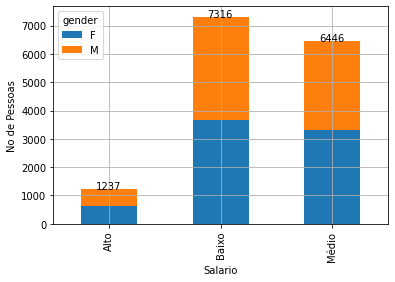

In [ ]:
# Plotando um Gráfico de Barras Estacados:
pd.crosstab(db['salary'], db['gender']).plot(kind='bar', stacked=True)
plt.ylabel("No de Pessoas") # Mudando a legenda do Eixo Y
plt.xlabel("Salario") # Mudando a legenda do Eixo X
positions = (0, 1, 2) # Definindo um vetor de posiçãp
labels = ("Alto", "Baixo", "Médio") # Definindo novos labels para o Eixo X
plt.xticks(positions, labels) # Mudando os valores do Eixo X utilizando "xticks", position + labels

############### Valores através de plt.text ##############

inic = -0.12
for i in lis:
  plt.text(inic, i, i)
  inic += 1

#######################################3
plt.grid()
plt.show()


Olhando os resultados em conjunto, é possível confirmar que **NÃO** há uma diferença salarial entre homens e mulheres.



### 2) Gênero e Sair da Empresa

> Segunda relação que testarei é entre Gênero e Sair da Empresa;
Aqui, testarei se há uma diferença entre o gênero do funcionário e sair ou não da empresa. Caso haja uma diferença, isso pode nos ajudar a pensar se há algo específico que influencie um gênero a sair da empresa mais do que o outro (um motivo que não seja salarial).

>> No entanto, como não houve diferença salarial entre os gêneros, o que aponta em direção de um banco de dados sem discrepância entre homens e mulheres, espera-se que essa diferença também esteja ausente na relação "gênero x sair da empresa"

In [ ]:
# Tabela:
gen_emp = pd.crosstab(db.left_company, db.gender, margins = True)
gen_emp_prcnt = pd.crosstab(db.left_company, db.gender, margins = True, normalize = True)
print(gen_emp)
print("-" * 50)
print(gen_emp_prcnt)

gender           F     M    All
left_company                   
0             5756  5672  11428
1             1840  1731   3571
All           7596  7403  14999
--------------------------------------------------
gender               F         M       All
left_company                              
0             0.383759  0.378159  0.761917
1             0.122675  0.115408  0.238083
All           0.506434  0.493566  1.000000


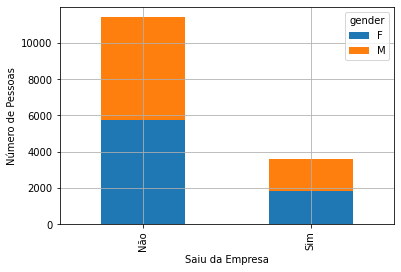

In [ ]:
# Gráfico:
pd.crosstab(db["left_company"], db["gender"]).plot(kind = "bar", stacked = True)
plt.xlabel("Saiu da Empresa") # Label do Eixo X
plt.ylabel("Número de Pessoas") # Label do Eixo Y
position = (0, 1) # Posições para o Eixo X
label = ("Não", "Sim") # Novos valores para o Eixo X
plt.xticks(position, label) # Mudando os labels dos valores do Eixo X
plt.grid()
plt.show()


Olhando ambos os resultados, assim como na relação anterior, é possível confirmar que **NÃO** há uma relação entre Gênero e Sair da Empresa, uma vez que distribuição se encontra praticamente igual entre os Gêneros Masculino e Feminino

### 3) Gênero, Salário e Nível na Empresa (cargo)

> Para testar essa relação, dividiremos a análise em três etapas:


1.   Filtrar o banco apenas pelos salários ALTOS;
2.   Filtrar o banco apenas pelos salários MÉDIOS;
3.   Filtrar o banco apenas pelos salários BAIXOS;

> Em cada etapa, realizaremos uma breve análise descritiva;



In [ ]:
# Confirmando as categorias da variável "salary":
db["salary"].unique().tolist()


['low', 'medium', 'high']

In [ ]:
# Verificando as categorias da variável "role" (cargo/função):
print(db["role"].unique().tolist())

## Podemos perceber que, caso deixemos assim, haverá um problema na ordem das categorias.
### Para tentar resolver esse problema, recodificaremos essa variável apenas para que a tabela e o gráfico fiquem mais fáceis de interpretar:

# Criando um dicionári para receber os novos nomes:
recode = {"Senior Director": "6 - Senior Director" ,
        "Director": "5 - Director" ,
        "Manager": "3 - Manager",
        "Level 2-4": "2 - Level 2-4",
        "Level 1": "1 - Level 1",
        "Senior Manager": "4 - Senior Manager",
        "VP": "7 - VP"}
db["role_novo"] = db["role"].map(recode)

print(sorted(db["role_novo"].unique())) # Confirmando a alteração

['VP', 'Senior Director', 'Director', 'Senior Manager', 'Manager', 'Level 2-4', 'Level 1']
['1 - Level 1', '2 - Level 2-4', '3 - Manager', '4 - Senior Manager', '5 - Director', '6 - Senior Director', '7 - VP']


In [ ]:
# 1. Filtrando apenas para aqueles com salários ALTOS:
db_sal_alto = db[(db["salary"] == "high")]

# Confirmando se foram selecionados apenas aqueles com salários altos:
print(db_sal_alto["salary"].unique().tolist())

['high']


In [ ]:
# Tabela:
tab_alto = pd.crosstab(db_sal_alto.role_novo, db_sal_alto.gender, margins = True)
tab_alto_prcnt = pd.crosstab(db_sal_alto.role_novo, db_sal_alto.gender, margins = True, normalize=True) # Normalize = True traz a frequencia relativa
print(tab_alto)
print("-" * 50)
print(tab_alto_prcnt)


gender                 F    M   All
role_novo                          
1 - Level 1          137  125   262
2 - Level 2-4        287  272   559
3 - Manager           93  124   217
4 - Senior Manager    61   56   117
5 - Director          21   27    48
6 - Senior Director   10   11    21
7 - VP                 4    9    13
All                  613  624  1237
--------------------------------------------------
gender                      F         M       All
role_novo                                        
1 - Level 1          0.110752  0.101051  0.211803
2 - Level 2-4        0.232013  0.219887  0.451900
3 - Manager          0.075182  0.100243  0.175424
4 - Senior Manager   0.049313  0.045271  0.094584
5 - Director         0.016977  0.021827  0.038804
6 - Senior Director  0.008084  0.008892  0.016977
7 - VP               0.003234  0.007276  0.010509
All                  0.495554  0.504446  1.000000


In [ ]:
tab_alto_prcnt = pd.crosstab(db_sal_alto.role_novo, db_sal_alto.gender, margins = True, normalize=True)
tab_alto_prcnt

gender,F,M,All
role_novo,,,
1 - Level 1,0.110752,0.101051,0.211803
2 - Level 2-4,0.232013,0.219887,0.451900
3 - Manager,0.075182,0.100243,0.175424
4 - Senior Manager,0.049313,0.045271,0.094584
5 - Director,0.016977,0.021827,0.038804
6 - Senior Director,0.008084,0.008892,0.016977
7 - VP,0.003234,0.007276,0.010509
All,0.495554,0.504446,1.000000


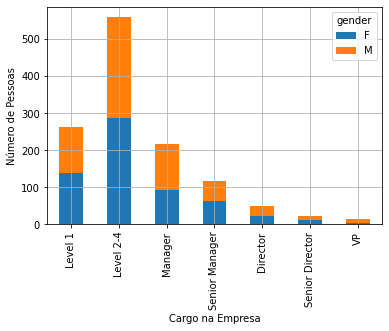

In [ ]:
pd.crosstab(db_sal_alto["role_novo"], db_sal_alto["gender"]).plot(kind = "bar", stacked = True)
plt.xlabel("Cargo na Empresa")
plt.ylabel("Número de Pessoas")
label = list(range(0, 7))
nomes = ("Level 1", "Level 2-4", "Manager", 
         "Senior Manager", "Director", "Senior Director",
         "VP")
plt.xticks(label, nomes)
plt.grid()
plt.show()


Com exceção da posição de Vice-Presidente, não há uma discrepância entre aqueles que recebem salários altos, seu gênero e seu caro na empresa. VP, sendo a unica exceção, possui o número de homens como sendo o dobro do número de mulheres.

In [ ]:
# 2. Filtrando apenas aqueles com salários médios:
db_sal_medio = db[(db["salary"] == "medium")]

# Conferindo se foram filtrados apenas aqueles com salários médios:
db_sal_medio["salary"].unique().tolist()

['medium']

In [ ]:
# Tabela:
tab_sal_medio = pd.crosstab(db_sal_medio["role_novo"], db_sal_medio["gender"], margins = True)
tab_sal_medio_prcnt = pd.crosstab(db_sal_medio["role_novo"], db_sal_medio["gender"], margins = True, normalize= True) # normalize = True traz o valor relativo
print(tab_sal_medio)
print("-" * 50)
print(tab_sal_medio_prcnt)

gender                  F     M   All
role_novo                            
1 - Level 1           712   665  1377
2 - Level 2-4        1541  1445  2986
3 - Manager           514   538  1052
4 - Senior Manager    288   263   551
5 - Director          146   153   299
6 - Senior Director    73    63   136
7 - VP                 25    20    45
All                  3299  3147  6446
--------------------------------------------------
gender                      F         M       All
role_novo                                        
1 - Level 1          0.110456  0.103165  0.213621
2 - Level 2-4        0.239063  0.224170  0.463233
3 - Manager          0.079739  0.083463  0.163202
4 - Senior Manager   0.044679  0.040800  0.085479
5 - Director         0.022650  0.023736  0.046385
6 - Senior Director  0.011325  0.009774  0.021098
7 - VP               0.003878  0.003103  0.006981
All                  0.511790  0.488210  1.000000


In [ ]:
# Criando um dicionário com as contagens de cada categoria, 
# assim podemos extrair apenas os valores das contagens ( para ajudar na plotagem dos valores)
dict(db_sal_medio["role_novo"].value_counts()) 

{'1 - Level 1': 1377,
 '2 - Level 2-4': 2986,
 '3 - Manager': 1052,
 '4 - Senior Manager': 551,
 '5 - Director': 299,
 '6 - Senior Director': 136,
 '7 - VP': 45}

In [ ]:
# Criando a lista com os valores:
lst = [1377, 2986, 1052, 551, 299, 136, 45]
lst

[1377, 2986, 1052, 551, 299, 136, 45]

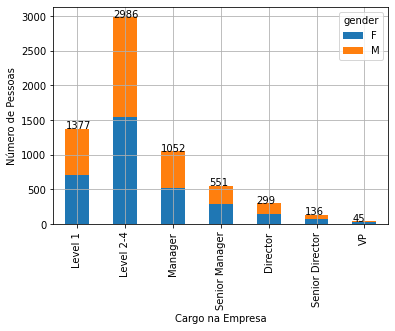

In [ ]:
pd.crosstab(db_sal_medio.role_novo, db_sal_medio.gender).plot(kind = "bar", stacked = True)
plt.xlabel("Cargo na Empresa")
plt.ylabel("Número de Pessoas")
label = list(range(0, 7))
nomes = ("Level 1", "Level 2-4", "Manager", 
         "Senior Manager", "Director", "Senior Director",
         "VP")
plt.xticks(label, nomes)

## Colocar os valores no Gráfico:
ini = -.25
for i in lst:
  plt.text(ini, i, str(i))
  ini += 1
##################################
plt.grid()
plt.show()

Entre aquelas pessoas de salário **médio**, não há uma discrepância entre gêneros e cargos ocupados na empresa. No entanto, diferentemente daqueles de salário **alto**, há um número de mulheres ocupando o cargo de Vice-Presidente maior do que homens. 

In [ ]:
# Filtrando apenas por aqueles que tem salário baixo:
db_sal_baixo = db[(db["salary"] == "low")]

# Conferindo se foram filtrados apenas aqueles com salários médios:
db_sal_baixo["salary"].unique().tolist()

['low']

In [ ]:
# Tabela
tab_sal_baixo = pd.crosstab(db_sal_baixo["role_novo"], db_sal_baixo["gender"], margins = False)
tab_sal_baixo

gender,F,M
role_novo,,
1 - Level 1,820,811
2 - Level 2-4,1663,1681
3 - Manager,580,571
4 - Senior Manager,344,308
5 - Director,164,149
6 - Senior Director,89,84
7 - VP,24,28


In [ ]:
## Se quiser uma tabela com porcentagens ##
tab_sal_baixo_prcnt = pd.crosstab(db_sal_baixo["role_novo"], db_sal_baixo["gender"], margins = False, normalize= True)
tab_sal_baixo_prcnt

gender,F,M
role_novo,,
1 - Level 1,0.112083,0.110853
2 - Level 2-4,0.227310,0.229770
3 - Manager,0.079278,0.078048
4 - Senior Manager,0.047020,0.042100
5 - Director,0.022417,0.020366
6 - Senior Director,0.012165,0.011482
7 - VP,0.003280,0.003827


In [ ]:
dict(db_sal_baixo["role_novo"].value_counts())


{'1 - Level 1': 1631,
 '2 - Level 2-4': 3344,
 '3 - Manager': 1151,
 '4 - Senior Manager': 652,
 '5 - Director': 313,
 '6 - Senior Director': 173,
 '7 - VP': 52}

In [ ]:
lst = [1631, 3344, 1151, 651, 313, 173, 52]

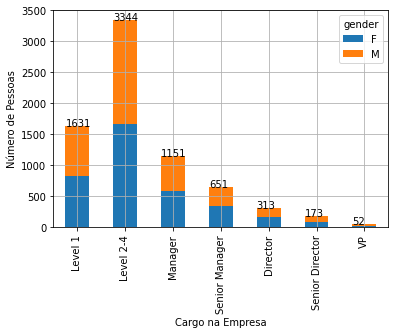

In [ ]:
# Gráfico
pd.crosstab(db_sal_baixo["role_novo"], db_sal_baixo["gender"]).plot(kind = "bar", stacked = True)
plt.xlabel("Cargo na Empresa") # Novo Label para o Eixo X
plt.ylabel("Número de Pessoas") # Novo Label para o Eixo Y
label = list(range(0, 7)) # Valores para, junto de "nomes", mudar os NOMES das categorias do Eixo X
nomes = ("Level 1", "Level 2-4", "Manager", 
         "Senior Manager", "Director", "Senior Director",
         "VP")
plt.xticks(label, nomes) # Mudar os nomes das categorias do Eixo X
####
ini = -.25
for i in lst:
  plt.text(ini, i, str(i))
  ini += 1
## Colocar os valores no Gráfico:

##################################
plt.grid() # plotar a "grade", as linhas por trás do gráfico;
plt.show()

Analisando os dados, através do gráfico e das tabelas, posso concluir que não há uma diferença significativa entre aqueles Gênero e Cargo na Empresa, entre os que possuem um salário baixo. 

Parece não haver uma relação entre gênero e cargo nas diferentes faixas de salário. No entanto, vale a pena ressaltar que, no caso dos salários altos, no que diz respeito ao cargo de Vice-Presidente, temos o dobro de homens que recebem salários altos em relação as mulheres. 

### 4) Tempo de Empresa e se Recebeu Promoção (nos últimos 5 anos)

Aqui irei verificar se há alguma relação entre o tempo de empresa e se a pessoa recebeu alguma promoção (nos ultimos 5 anos).

O senso comum pode, muitas vezes, relacionar tempo de empresa com promoção. Aqui verificarei se isso acontece no nosso banco.

In [ ]:
# Verificando os valores únicos:
print(db["promotion_last_5years"].unique().tolist())

[0, 1]


In [ ]:
# Tabela:
prom_time = pd.crosstab(db.promotion_last_5years, db.time_spend_company, margins = True)
prom_time_prcnt = pd.crosstab(db.promotion_last_5years, db.time_spend_company, margins = True, normalize = True)

prom_time

time_spend_company,2,3,4,5,6,7,8,10,All
promotion_last_5years,,,,,,,,,
0,3190,6309,2522,1456,701,152,152,198,14680
1,54,134,35,17,17,36,10,16,319
All,3244,6443,2557,1473,718,188,162,214,14999


In [ ]:
prom_time_prcnt # porcentagem

time_spend_company,2,3,4,5,6,7,8,10,All
promotion_last_5years,,,,,,,,,
0,0.212681,0.420628,0.168145,0.097073,0.046736,0.010134,0.010134,0.013201,0.978732
1,0.003600,0.008934,0.002333,0.001133,0.001133,0.002400,0.000667,0.001067,0.021268
All,0.216281,0.429562,0.170478,0.098207,0.047870,0.012534,0.010801,0.014268,1.000000


In [ ]:
# Agora vou criar um SUBSET com apenas os que foram promovidos (promotion_last_5years = 1)
db_prom = db[(db["promotion_last_5years"] == 1)]

In [ ]:
dict(db_prom["time_spend_company"].value_counts())

{2: 54, 3: 134, 4: 35, 5: 17, 6: 17, 7: 36, 8: 10, 10: 16}

In [ ]:
lst = [54, 134, 35, 17, 17, 36, 10, 16]

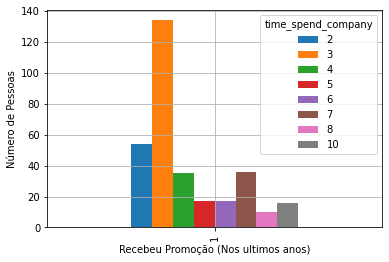

In [ ]:
# Plotar Gráfico:
pd.crosstab(db_prom.promotion_last_5years, db.time_spend_company).plot(kind="bar")
plt.xlabel("Recebeu Promoção (Nos ultimos anos)")
plt.ylabel("Número de Pessoas")
plt.grid()
plt.show()

Com os dados acima, podemos ver que, das pessoas que receberam promoções nos últimos 5 anos, a maioria possuía 3 anos de empresa. Como estão classificados os salários dessas pessoas promovidas?

In [ ]:
# Tabelas
prom_sal = pd.crosstab(db.promotion_last_5years, db.salary, margins = True)
prom_sal

salary,high,low,medium,All
promotion_last_5years,,,,
0,1165,7250,6265,14680
1,72,66,181,319
All,1237,7316,6446,14999


In [ ]:
prom_sal_prcnt = pd.crosstab(db.promotion_last_5years, db.salary, margins = True, normalize = True)
prom_sal_prcnt

salary,high,low,medium,All
promotion_last_5years,,,,
0,0.077672,0.483366,0.417695,0.978732
1,0.004800,0.004400,0.012067,0.021268
All,0.082472,0.487766,0.429762,1.000000


Podemos ver que a soma da quantidade de pessoas promovidas com salários classificados como baixo e médio é maior quee aqueles classificados como alto. O fato da pessoa ter sido promovida mas possuir salário classificado como baixo, pode influenciar sua saída da empresa?

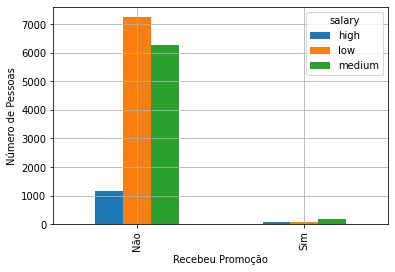

In [ ]:
# Gráficos:
## 1) Receber (ou não) promoções e Salário 
pd.crosstab(db.promotion_last_5years, db.salary).plot(kind="bar")
plt.xlabel("Recebeu Promoção")
plt.ylabel("Número de Pessoas")
pos = (0, 1)
nome = ("Não", "Sim")
plt.xticks(pos, nome)
plt.grid()
plt.show()

In [ ]:
dict(db_prom.salary.value_counts())

{'high': 72, 'low': 66, 'medium': 181}

In [ ]:
lst = [72, 66, 181]

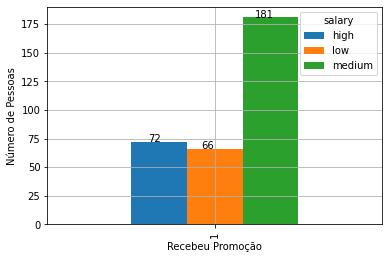

In [ ]:
## 2) Recebeu promoção e Salário:
pd.crosstab(db_prom.promotion_last_5years, db_prom.salary).plot(kind = "bar")
plt.xlabel("Recebeu Promoção")
plt.ylabel("Número de Pessoas")
inic = -0.20
for i in lst:
  plt.text(inic, i, str(i))
  inic += 0.16
plt.grid()
plt.show()


In [ ]:
# Agora, para ver se aquelas pessoas que RECEBERAM promoção, mas possuem salarios baixos ou médios sairam mais da empresa, irei fazer um subset:
db_left = db[(db["left_company"] == 1)]
db_left.shape

(3571, 68)

In [ ]:
left_prom_sal = pd.crosstab(db_left.promotion_last_5years, db_left.salary, margins = True)
left_prom_sal_prcnt = pd.crosstab(db_left.promotion_last_5years, db_left.salary, margins = True, normalize = True)

print(left_prom_sal)
print("_" * 65)
print(left_prom_sal_prcnt)

salary                 high   low  medium   All
promotion_last_5years                          
0                        82  2158    1312  3552
1                         0    14       5    19
All                      82  2172    1317  3571
_________________________________________________________________
salary                     high       low    medium       All
promotion_last_5years                                        
0                      0.022963  0.604313  0.367404  0.994679
1                      0.000000  0.003920  0.001400  0.005321
All                    0.022963  0.608233  0.368804  1.000000


Podemos ver que ninguem com salário classificado como alto, que teve alguma promoção nos últimos 5 anos, deixou empresa. A grande maioria (que deixou a empresa) estava com salário classificado como baixo, apesar das diferenças não serem grandes.

### **5**) Sair da Empresa e Ter Sido Promovido

Agora iremos ver se há uma relação entre ter saido da empresa e ter recebido uma promoção.

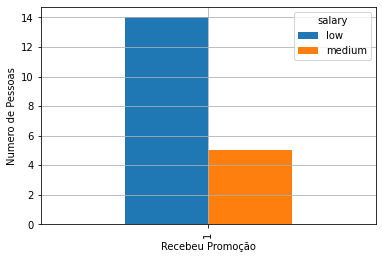

In [ ]:
# Fazendo um subset para pegar APENAS aqueles que já sairam da empresa e que foram promovidos nos ultimos 5 anos
db_left_prom = db[(db["left_company"] == 1) & (db["promotion_last_5years"] == 1)] # Subsetting
db_left_prom["left_company"].unique().tolist() # Verificando os valores únicos, para ver se o subsetting deu certo
db_left_prom["promotion_last_5years"].unique().tolist() 


In [ ]:
dict(db_left_prom["salary"].value_counts())
lst = [14, 5]

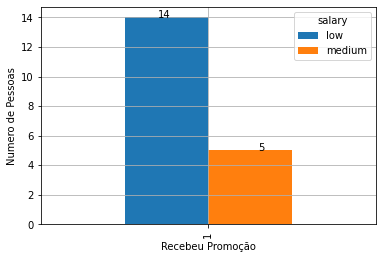

In [ ]:
# Gráfico
pd.crosstab(db_left_prom.promotion_last_5years, db_left_prom.salary).plot(kind = "bar") # Plotando um gráfico para verificar
plt.xlabel("Recebeu Promoção")
plt.ylabel("Numero de Pessoas")
inic = -0.15
for i in lst:
  plt.text(inic, i, i)
  inic += 0.30
plt.grid()
plt.show()

Podemos observar que, das pessoas que saíram da empresa e que receberam promoções nos ultimos 5 anos, nenhuma possuia salário alto, havendo apenas pessoas com salários considerados baixos e medianos;

### **6)** Avaliação do Funcionário e Quantidade de Projetos 

Existe alguma relação entre a avaliação do colaborador e a quantidade de projetos em que ele atua?


In [ ]:
# Primeiro Passo: criar uma função para transformar a variável "avaliação do funcionário" em uma variável categórica, contendo diferentes "faixas"
# de pontuação:
def av_cat(x):
    if 0.3 < x < 0.4:
        return "0.3 - 0.4"
    if 0.4 <= x < 0.5:
        return "0.4 - 0.5"
    if 0.5 <= x < 0.6:
        return "0.5 - 0.6"
    if 0.6 <= x < 0.7:
        return "0.6 - 0.7"
    if 0.7 <= x < 0.8:
        return "0.7 - 0.8"
    if 0.8 <= x < 0.9:
        return "0.8 - 0.9"
    elif x >= 0.9:
        return "0.9 - 1"

In [ ]:
db['cat_eval'] = db['last_evaluation'].apply(av_cat) # Aplicando a função e criando uma nova variável
proj_eval = pd.crosstab(db.cat_eval, db.number_project, margins = True, normalize = True) # Crosstab para veriricar a distribuição das variáveis
proj_eval


number_project,2,3,4,5,6,7,All
cat_eval,,,,,,,
0.3 - 0.4,0.002734,0.003134,0.001933,0.002400,0.001733,0.000000,0.011934
0.4 - 0.5,0.046070,0.017334,0.016068,0.008334,0.004334,0.000467,0.092606
0.5 - 0.6,0.074605,0.051937,0.051737,0.027135,0.005734,0.000467,0.211614
0.6 - 0.7,0.010134,0.054937,0.050203,0.027468,0.006600,0.000133,0.149477
0.7 - 0.8,0.010601,0.049537,0.048870,0.029202,0.011801,0.001667,0.151677
0.8 - 0.9,0.006934,0.045270,0.057737,0.040336,0.026135,0.007067,0.183479
0.9 - 1,0.008134,0.048203,0.064471,0.049203,0.021935,0.007267,0.199213
All,0.159211,0.270351,0.291019,0.184079,0.078272,0.017068,1.000000


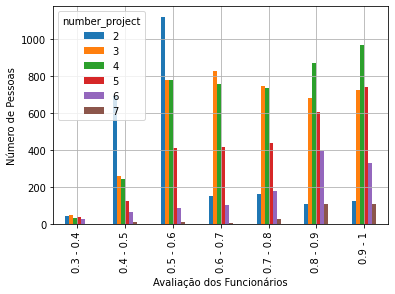

In [ ]:
# Plotando um Gráfico:
pd.crosstab(db.cat_eval, db.number_project).plot(kind = "bar")
plt.xlabel("Avaliação dos Funcionários")
plt.ylabel("Número de Pessoas")
plt.grid()
plt.show()

Podemos observar que a maioria das pessoas que estão em 6 ou 7 projetos são aquelas que foram avaliadas nas faixas mais altas de notas. Diante disso podemos perceber uma relação entre a avaliação recebida e a quantidade de projetos que o colaborador atua.

### **7)** Porcentagem de Trabalho Home Office e Quantidade de Projetos

Podemos encontrar alguma relação entre o trabalho remoto e aumento da produtividade? Espera-se que o ambiente de trabalho home office permita com que as pessoas sejam mais produtivas, otimizando seu tempo e sua produtivade.

In [ ]:
# Criando uma crosstable entre as variáveis "number_project" e "percent_remote"
proj_remote = pd.crosstab(db.percent_remote, db.number_project, margins = True, normalize = True)
proj_remote

number_project,2,3,4,5,6,7,All
percent_remote,,,,,,,
0.4,0.129075,0.102407,0.099273,0.053870,0.015801,0.001067,0.401493
0.5,0.004867,0.028269,0.023935,0.014001,0.003067,0.000000,0.074138
0.8,0.025202,0.139676,0.167611,0.115674,0.059404,0.016001,0.523568
1.0,0.000067,0.000000,0.000200,0.000533,0.000000,0.000000,0.000800
All,0.159211,0.270351,0.291019,0.184079,0.078272,0.017068,1.000000


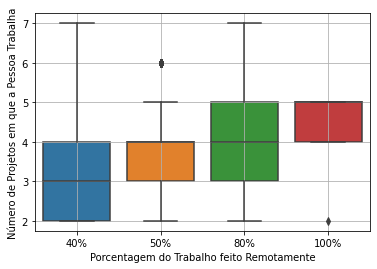

In [ ]:
# Plotando um boxplot para ajudar a encontar uma relação:
sns.boxplot(x=db.percent_remote, y=db.number_project, data=pd.melt(db))
plt.xlabel("Porcentagem do Trabalho feito Remotamente")
plt.ylabel("Número de Projetos em que a Pessoa Trabalha")
valores = [0, 1, 2, 3]
lab = ["40%", "50%", "80%", "100%"]
plt.xticks(valores, lab)
plt.grid()
plt.show()

Podemos propor a partir da análise do gráfico, que pessoas que atuam mais tempo no modelo de trabalho homeoffice, tendem a atuar em maiores quantidades de projetos.